##📚  Importamos la librerias para desplegar analisis del caso de uso


In [51]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import skew, kurtosis

## 𝄜 agregamos el documento .csv

In [52]:
uploaded = files.upload()
if uploaded:
    file_name = next(iter(uploaded))
    df = pd.read_csv(file_name)
    print("Archivo cargado exitosamente!")
else:
    print("No se seleccionó ningún archivo.")

Saving weatherAUS.csv to weatherAUS (4).csv
Archivo cargado exitosamente!


# FASE 2 CRISP-DM

# 1. 📌Exploración Inicial Estructura y dimensiones del Data Frame
## 1.1 Desplegamos el data frame 𝄜

In [53]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


## 1.2 🌐 Traducimos etiquetando las columnas al español y cambiamos a CamelCase🐫 los nombres de las columnas 𝄜

In [54]:
df= df.rename(columns={
    "Date":"Fecha",
    "Location": "Ubicacion",
    "MinTemp":"TemperaturaMinima",
    "MaxTemp":"TemperaturaMaxima",
    "Rainfall":"Lluvia",
    "Evaporation":"Evaporacion(mm)",
    "Sunshine":"N_horas_Sol_diarias",
    "WindGustDir":"DireccionRafagaViento",
    "WindGustSpeed":"VelocidadRafagaViento",
    "WindDir9am":"DireccionViento9am",
    "WindDir3pm":"DireccionViento3pm",
    "WindSpeed9am":"VelocidadViento9am",
    "WindSpeed3pm":"VelocidadViento3pm",
    "Humidity9am":"Humedad9am",
    "Humidity3pm":"Humedad3pm",
    "Pressure9am":"Presion9am",
    "pressure3pm":"Presion3pm",
    "Cloud9am":"Nubes9am",
    "Cloud3pm":"Nubes3pm",
    "Temp9am":"Temperatura9am",
    "Temp3pm":"Temperatura3pm",
    "RainToday":"LluviaHoy",
    "RISK_MM":"Riesgo(mm)",
    "RainTomorrow":"LluviaMañana",
})

##1.3 Volvemos a desplegar nuestro data Frame  𝄜 traducido al español

In [55]:
df.head()

,Fecha,Ubicacion,TemperaturaMinima,TemperaturaMaxima,Lluvia,Evaporacion(mm),N_horas_Sol_diarias,DireccionRafagaViento,VelocidadRafagaViento,DireccionViento9am,...,Humedad3pm,Presion9am,Pressure3pm,Nubes9am,Nubes3pm,Temperatura9am,Temperatura3pm,LluviaHoy,Riesgo(mm),LluviaMañana
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


##1.4 Contamos la cantitad de filas y columnas  𝄜

In [56]:
df.shape

(142193, 24)

### Tenemos un total de 142.193 Filas con 24 columnas 👨🏻‍💻

 ## 1.5 Obtenemos un resumen del data frame que nos mostrara la cantidad de datos No! nulos de cada columna y el tipo de columna (object,float64)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Fecha                  142193 non-null  object 
 1   Ubicacion              142193 non-null  object 
 2   TemperaturaMinima      141556 non-null  float64
 3   TemperaturaMaxima      141871 non-null  float64
 4   Lluvia                 140787 non-null  float64
 5   Evaporacion(mm)        81350 non-null   float64
 6   N_horas_Sol_diarias    74377 non-null   float64
 7   DireccionRafagaViento  132863 non-null  object 
 8   VelocidadRafagaViento  132923 non-null  float64
 9   DireccionViento9am     132180 non-null  object 
 10  DireccionViento3pm     138415 non-null  object 
 11  VelocidadViento9am     140845 non-null  float64
 12  VelocidadViento3pm     139563 non-null  float64
 13  Humedad9am             140419 non-null  float64
 14  Humedad3pm             138583 non-nu

# 2. 📌Detección de valores faltantes o duplicados en el Data Frame
##2.1 sumamos la cantidad de casillas con valores nulos de cada columna 𝄜

In [ ]:
df.isnull().sum()

,0
Fecha,0
Ubicacion,0
TemperaturaMinima,637
TemperaturaMaxima,322
Lluvia,1406
Evaporacion(mm),60843
N_horas_Sol_diarias,67816
DireccionRafagaViento,9330
VelocidadRafagaViento,9270
DireccionViento9am,10013


#⚠️Se detecta cantidad extremadamente alta de valores nulos ⚠️

## 2.1.1 Visualizaremos y calcularemos el porcentaje de nulos por columna para para priorizar que columnas Mantener/Imputar/Eliminar

### Visualizamos 👀:

<Axes: >

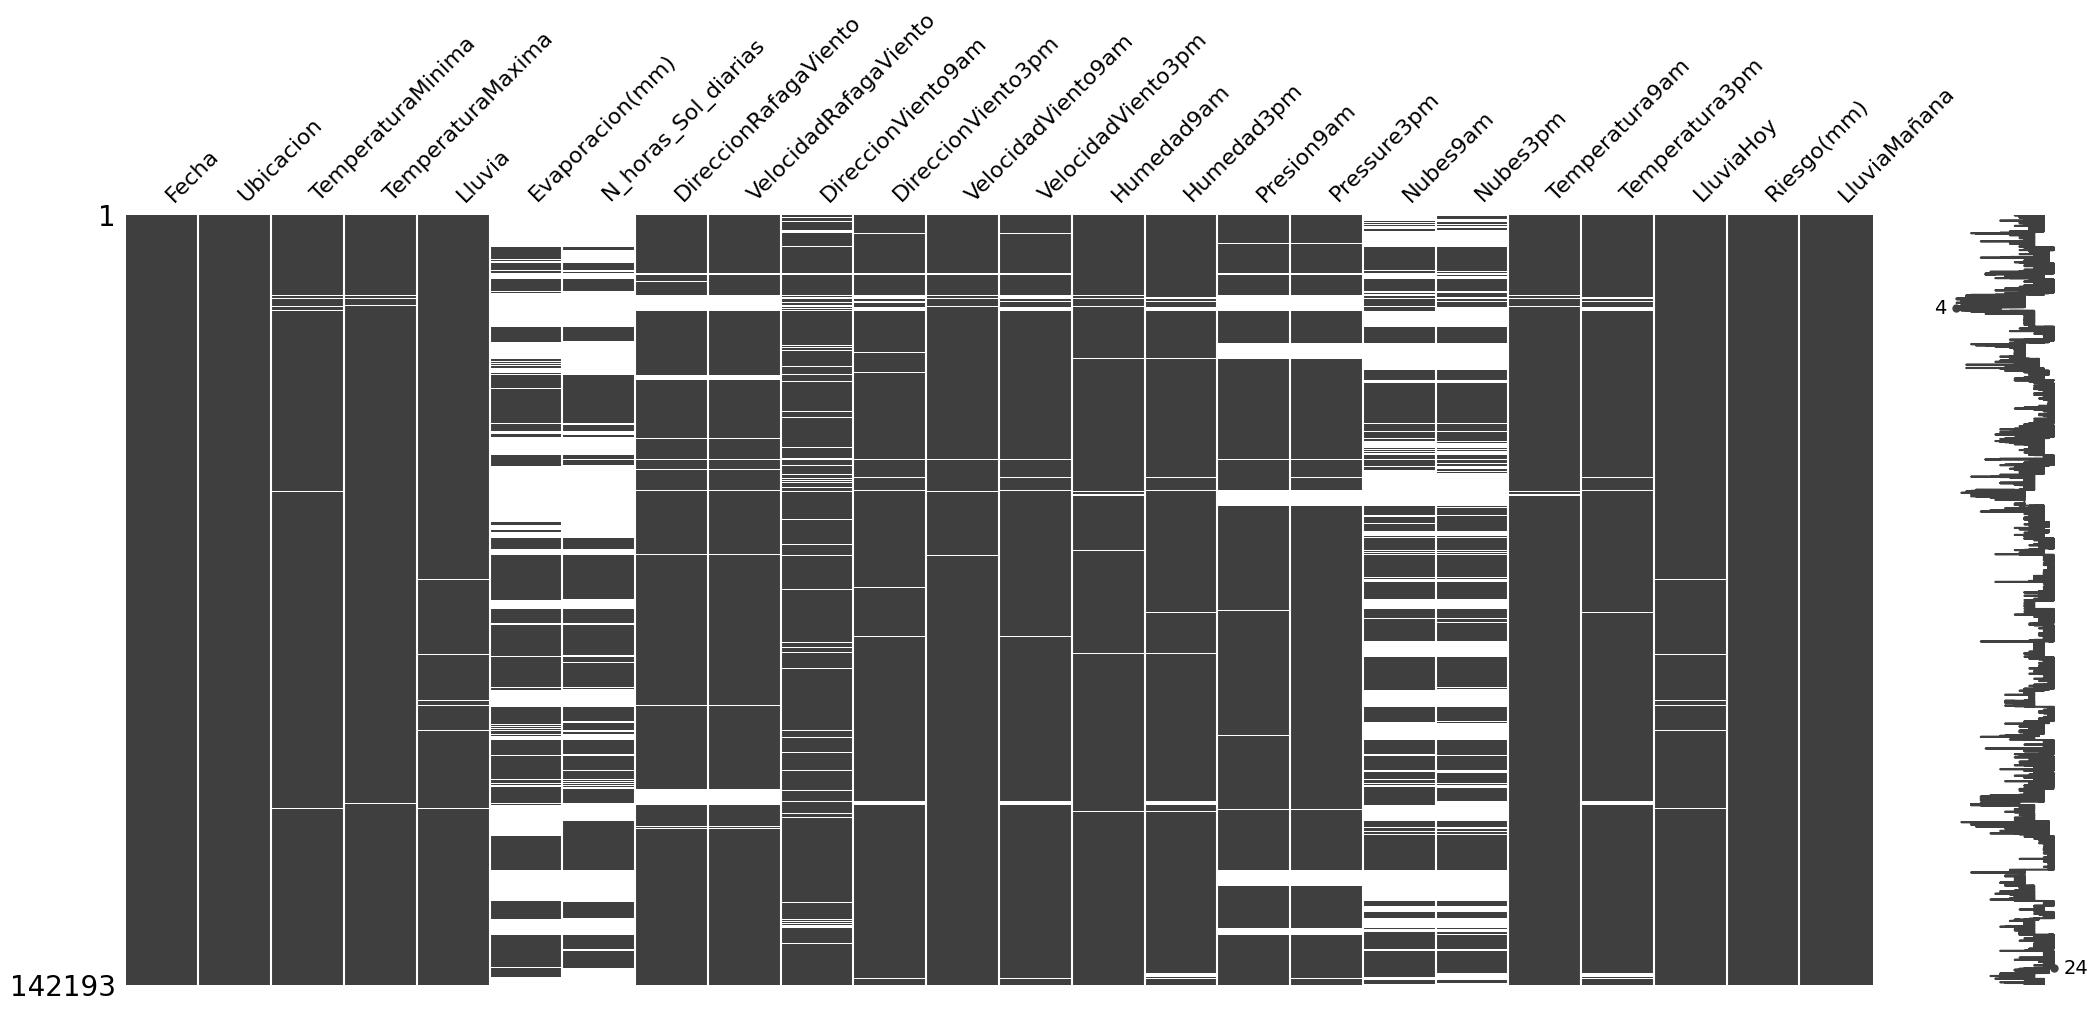

In [ ]:
msno.matrix(df)

### calculamos el porcentaje de valores nulos por columna

In [ ]:
null_porcentaje = (df.isnull().mean() * 100).round(2)
print(null_porcentaje.sort_values(ascending=False))

N_horas_Sol_diarias      47.69
Evaporacion(mm)          42.79
Nubes3pm                 40.15
Nubes9am                 37.74
Presion9am                9.86
Pressure3pm               9.83
DireccionViento9am        7.04
DireccionRafagaViento     6.56
VelocidadRafagaViento     6.52
DireccionViento3pm        2.66
Humedad3pm                2.54
Temperatura3pm            1.92
VelocidadViento3pm        1.85
Humedad9am                1.25
Lluvia                    0.99
LluviaHoy                 0.99
VelocidadViento9am        0.95
Temperatura9am            0.64
TemperaturaMinima         0.45
TemperaturaMaxima         0.23
Ubicacion                 0.00
Fecha                     0.00
Riesgo(mm)                0.00
LluviaMañana              0.00
dtype: float64


PD: Durante la fase 3 del metodo crisp-dm seleccionaremos las estrategias a realizar con valores nulos


##2.2 sumamos la cantidad de casillas con valores duplicados de cada columna 𝄜

In [ ]:
df.duplicated().sum()

np.int64(0)

### No se encuentran valores duplicados 👨🏻‍💻

#3. 📌Realizamos estadistica descriptiva al Data Frame

In [ ]:
df.describe()

,TemperaturaMinima,TemperaturaMaxima,Lluvia,Evaporacion(mm),N_horas_Sol_diarias,VelocidadRafagaViento,VelocidadViento9am,VelocidadViento3pm,Humedad9am,Humedad3pm,Presion9am,Pressure3pm,Nubes9am,Nubes3pm,Temperatura9am,Temperatura3pm,Riesgo(mm)
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
stats_df = pd.DataFrame({
    'Skewness': df[numeric_cols].apply(skew),
    'Kurtosis': df[numeric_cols].apply(kurtosis),
    'CV': (df[numeric_cols].std() / df[numeric_cols].mean()).round(2)  # Coeficiente de variación
})
print(stats_df)

                       Skewness    Kurtosis    CV
TemperaturaMinima           NaN         NaN  0.53
TemperaturaMaxima           NaN         NaN  0.31
Lluvia                      NaN         NaN  3.60
Evaporacion(mm)             NaN         NaN  0.77
N_horas_Sol_diarias         NaN         NaN  0.50
VelocidadRafagaViento       NaN         NaN  0.34
VelocidadViento9am          NaN         NaN  0.64
VelocidadViento3pm          NaN         NaN  0.47
Humedad9am                  NaN         NaN  0.28
Humedad3pm                  NaN         NaN  0.40
Presion9am                  NaN         NaN  0.01
Pressure3pm                 NaN         NaN  0.01
Nubes9am                    NaN         NaN  0.65
Nubes3pm                    NaN         NaN  0.60
Temperatura9am              NaN         NaN  0.38
Temperatura3pm              NaN         NaN  0.32
Riesgo(mm)             9.836799  178.161945  3.59


In [ ]:
print("Valores únicos por columna:")
print(df[['TemperaturaMinima', 'TemperaturaMaxima','Lluvia',
          'Evaporacion(mm)','N_horas_Sol_diarias',
          'VelocidadRafagaViento','VelocidadViento9am',
          'VelocidadViento3pm','Humedad9am','Humedad3pm',
          'Presion9am','Pressure3pm','Nubes9am','Nubes3pm',
          'Temperatura9am','Temperatura3pm','Riesgo(mm)']].nunique())

Valores únicos por columna:
TemperaturaMinima        389
TemperaturaMaxima        505
Lluvia                   679
Evaporacion(mm)          356
N_horas_Sol_diarias      145
VelocidadRafagaViento     67
VelocidadViento9am        43
VelocidadViento3pm        44
Humedad9am               101
Humedad3pm               101
Presion9am               546
Pressure3pm              549
Nubes9am                  10
Nubes3pm                  10
Temperatura9am           440
Temperatura3pm           500
Riesgo(mm)               681
dtype: int64


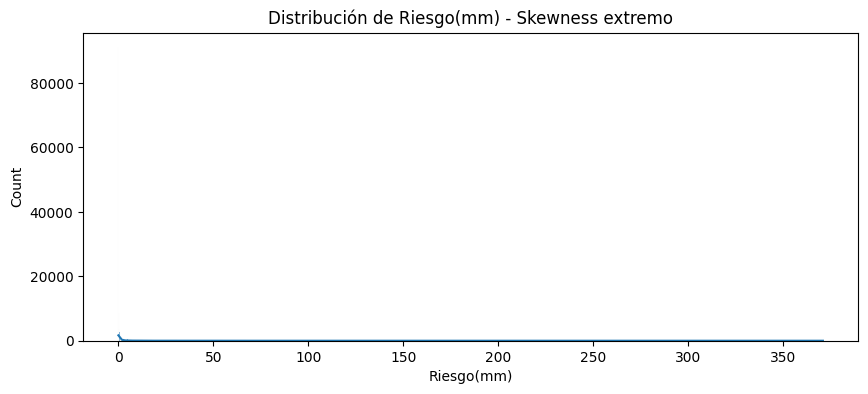

In [ ]:
plt.figure(figsize=(10, 4))
sns.histplot(df['Riesgo(mm)'].dropna(), kde=True)
plt.title('Distribución de Riesgo(mm) - Skewness extremo')
plt.show()

In [58]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
if not categorical_cols.empty:
    print("\nFrecuencias categóricas:")
    for col in categorical_cols:
        print(f"\n{col}:")
        print(df[col].value_counts(normalize=True).head(10))  # Top 10 categoríascategorical_cols = df.select_dtypes(include=['object', 'category']).columns
if not categorical_cols.empty:
    print("\nFrecuencias categóricas:")
    for col in categorical_cols:
        print(f"\n{col}:")
        print(df[col].value_counts(normalize=True).head(10))  # Top 10 categorías


Frecuencias categóricas:

Fecha:
Fecha
2017-06-23    0.000345
2013-03-04    0.000345
2014-04-13    0.000345
2014-03-25    0.000345
2017-05-18    0.000345
2017-06-15    0.000345
2017-06-14    0.000345
2017-06-12    0.000345
2017-06-10    0.000345
2017-06-09    0.000345
Name: proportion, dtype: float64

Ubicacion:
Ubicacion
Canberra        0.024038
Sydney          0.023468
Perth           0.022455
Darwin          0.022448
Hobart          0.022420
Brisbane        0.022230
Adelaide        0.021731
Bendigo         0.021337
Townsville      0.021330
AliceSprings    0.021316
Name: proportion, dtype: float64

DireccionRafagaViento:
DireccionRafagaViento
W      0.073610
SE     0.070065
E      0.068273
N      0.067987
SSE    0.067686
S      0.067355
WSW    0.066994
SW     0.066211
SSW    0.064804
WNW    0.060709
Name: proportion, dtype: float64

DireccionViento9am:
DireccionViento9am
N      0.086193
SE     0.069315
E      0.068271
SSE    0.067832
NW     0.064700
S      0.064253
W      0.062491
S